## Gathering data
we have three types of data.

first we have twitter enhanced csv which is very easy to obtain

second we will download programmticaly the neural network result # tsv

third we will use the twitter api to download additional data json


In [1]:
import pandas as pd 
import numpy as np 
import requests
import tweepy
import glob
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## twitter-archive-enhanced
### we uploaded the file 
we will read it through read csv


In [2]:
df_1=pd.read_csv('twitter-archive-enhanced.csv')
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### .we will use the url to download additional data

### we will read the image_predictions.tsv

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [3]:
df_image=pd.read_csv('image_predictions.tsv',sep="\t")
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## Twitter Api
we will use twitter Api to extract additional data 

In [ ]:

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### we generate tweet_json.txt 
we will use some regular experission an   

In [4]:

id_list=[] 
tweet_list=[] 
fav_count_list=[]
import re
for i in glob.glob("tweet_json.txt"):
    with open(i,encoding='utf-8') as file:
        d=file.readlines()
        for w in range(len(d)):
            fav_count=re.search('"favorite_count": ([0-9]+)+,',d[w])
            tweet_count=re.search('"retweet_count": ([0-9]+)+,',d[w])
            id_=re.search('"id": ([0-9]+)+,',d[w])
            id_list.append(id_[1])
            tweet_list.append(tweet_count[1])
            fav_count_list.append(fav_count[1])
            
df_list={'id':id_list,'retweet_count':tweet_list,'favorite_count':fav_count_list}       
df=pd.DataFrame(df_list,columns=['id','favorite_count','retweet_count'])    
df

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


## Assesing data

after we finished gathering data and dealing with various data types

we will assess data first visually then programtically


# Visual assesment

## The twitter-enhanced.csv

1.in_reply_to_status_id,in_reply_to_user_id,	
retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp doggo	floofer	pupper	puppo
most of them are None

4
some names isn't existed


## image predictions

1.the columns' name are confusing and not definitive




# programmatic assesment

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
sum(df_1.duplicated())

0

In [11]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
df_1.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Buddy         7
Bailey        7
an            7
Toby          7
Daisy         7
Rusty         6
Koda          6
Bella         6
Dave          6
Stanley       6
Milo          6
Jack          6
Oscar         6
Scout         6
Jax           6
Leo           6
Bentley       5
           ... 
Teddy         1
Godi          1
Dylan         1
Ziva          1
Furzey        1
Blu           1
Ralf          1
Ralphson      1
Fynn          1
Fletcher      1
Yoda          1
Tessa         1
Griswold      1
Remus         1
Mollie        1
Gordon        1
Halo          1
Willy         1
Shooter       1
Maya          1
Mutt          1
Hall          1
Coopson       1
Barclay       1
Harry         1
Lupe          1
Robin         1
Edd           1
Saydee        1
Wiggles       1
Name: name, Length: 957,

In [8]:
df_1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [9]:
df_1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [10]:
df_1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
df_1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [12]:
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
sum(df_image.duplicated())

0

In [19]:
df_image.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null object
retweet_count     2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [7]:
df.describe()

,id,favorite_count,retweet_count
count,2354,2354,2354
unique,2354,2027,1722
top,801167903437357056,2176,1972
freq,1,3,5


# Quality 

## twitter enhanced 

timpstamp is object not time stamp


retweeted_status_id	is not necessary and could be seperated 

retweeted_status_user_id is not necessary and could be seperated

retweeted_status_timestam is not necessary and could be seperated

demoniator and numerator ratings are not consistanta, and should be object

some names are none and a

tweet_id is int it should be str

split in_reply_to_status_id,in_reply_to_user_id, status timestamp in another data frame 

split urls in sepetrate data frame

## image predictions 

tweet id is int

p1,p2,p3 aren't meaningful

p1,p2,p3 should be catogorial

## Counts Data Frame

tweets counts are str, they should be int 

favorite counts are str, thery should be int

# Tideness

## twitter echanced


floofer, pupper,and puppo should be in one kind column

we can merge image prediction and twitter enhanced

we should merge the retweet counts and favorite counts with twitter enhanced.


# Cleaning 

first we should make a copy for each dataframe 

In [6]:
df_1clean=df_1.copy()
df_imageclean=df_image.copy()
df_count_clean=df.copy()

#### Time stamp is object not time stamp type & tweet id&p1,p2,p3 should be catogorial & tweets counts are str, they should be int 

#### favorite counts are str, thery should be int

###### Define

we will use pandasto.datatime and astype

#### code

In [7]:
#change timestamp with to_datetime
df_1clean.timestamp=pd.to_datetime(df_1clean.timestamp)
df_1clean.retweeted_status_timestamp=pd.to_datetime(df_1clean.retweeted_status_timestamp)
# change tweet_id in twitter enhanced and image predictions
df_1clean.tweet_id=df_1clean.tweet_id.astype(str)
df_imageclean.tweet_id=df_imageclean.tweet_id.astype(str)
# change favorite counts and retweets counts
df_count_clean.retweet_count=df_count_clean.retweet_count.astype(int)
df_count_clean.favorite_count=df_count_clean.favorite_count.astype(int)

#### Test

In [52]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null object
name                          2319 non-null object
doggo                         2356 non-null object
dog_type                      2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
algorithm_prediction

In [26]:
df_imageclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [27]:
df_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### denominator and numerator 

#### Define 

We will use astype method

we will extract the float numerator

##### Code

In [10]:
df_1clean.rating_denominator=df_1clean.rating_denominator.astype(float)
df_1clean.rating_numerator=df_1clean.rating_numerator.astype(float)
df_1clean[df_1clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


#### Test

In [29]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null object
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns

### Twitter enhanced names 

##### Define 

some name are just 'a' so we will use some regular expression, loc method
and if statment.

#### code

In [11]:
s=df_1clean.loc[df_1clean['name']=='a']
for i in s['text']:
    name1=re.search('named ([A-Za-z]+)+\.',i)
    name2=re.search('[h|H]is name is ([A-Za-a]+)\+.',i)
    if name1 != None:
        df_1clean.loc[df_1clean['text']==i,'name']=name1[1]
    elif name2 != None:
        df_1clean.loc[df_1clean['text']==i,'name']=name2[1]
    else:
        df_1clean.loc[df_1clean['text']==i,'name']= None
        

### Test

In [67]:
df_1clean.name.value_counts()

None         745
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Buddy          7
an             7
Daisy          7
Toby           7
Scout          6
Bella          6
Jax            6
Dave           6
Oscar          6
Leo            6
Milo           6
Rusty          6
Jack           6
Koda           6
Stanley        6
George         5
Sammy          5
            ... 
Shnuggles      1
Lambeau        1
Smiley         1
Anna           1
Tycho          1
Blipson        1
Enchilada      1
Callie         1
Coopson        1
Remus          1
Mollie         1
Gordon         1
Halo           1
Willy          1
Fynn           1
Shooter        1
Mutt           1
Hall           1
Barclay        1
Gunner         1
Harry          1
Lupe           1
Robin          1
Edd            1
Saydee         1
Maya           1
Ralf           1
Caryl         

In [34]:
# sample to make sure the name was 'a'
s=df_1clean.loc[df_1clean['text']=='This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba']
s

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2249,667861340749471744,NaN,NaN,2015-11-21 00:25:26,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667861340...,9,10,Cheryl,None,None,None,None


### P1 P2 P3 in Image predictions

##### first they are not meaningful

### Define 

we will change the columms names 


#### Code

In [12]:
df_imageclean.rename(columns={'p1':'algorithm_prediction_1','p1_conf':'algorithm_1_conf','p2':'algorithm_prediction_2','p2_conf':'algorithm_2_conf','p3':'algorithm_prediction_3','p3_conf':'algorithm_3_conf','p1_dog':'breed_of_dog_1','p2_dog':'breed_of_dog_2','p3_dog':'breed_of_dog_3'},inplace = True)


### Test

In [74]:
df_imageclean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'algorithm_prediction_1',
       'algorithm_1_conf', 'breed_of_dog_1', 'algorithm_prediction_2',
       'algorithm_2_conf', 'breed_of_dog_2', 'algorithm_prediction_3',
       'algorithm_3_conf', 'breed_of_dog_3'],
      dtype='object')

### Code 


In [13]:
# make image prediction catogrical
df_imageclean.algorithm_prediction_1=df_imageclean.algorithm_prediction_1.astype('category')
df_imageclean.algorithm_prediction_2=df_imageclean.algorithm_prediction_2.astype('category')
df_imageclean.algorithm_prediction_3=df_imageclean.algorithm_prediction_3.astype('category')

### Test

In [76]:
df_imageclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
algorithm_prediction_1    2075 non-null category
algorithm_1_conf          2075 non-null float64
breed_of_dog_1            2075 non-null bool
algorithm_prediction_2    2075 non-null category
algorithm_2_conf          2075 non-null float64
breed_of_dog_2            2075 non-null bool
algorithm_prediction_3    2075 non-null category
algorithm_3_conf          2075 non-null float64
breed_of_dog_3            2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


### collecting floofer , pupper and puppo in one column 

we didn't inculde doggo because we get some times doggo and other kind 

#### Define

we create puppo, floofer and puppo columns and concat them

then merge it merge with df_1clean 

then drop the columns


In [14]:
# we search for every element 
s=df_1clean.loc[df_1clean['pupper']=='pupper']
s1=df_1clean.loc[df_1clean['puppo']=='puppo']
s2=df_1clean.loc[df_1clean['floofer']=='floofer']
# we will make two columns with tweet_id and the element required
s5=s[['tweet_id','pupper']]
s5.rename(columns={'pupper':'dog_type'},inplace=True)
s6=s1[['tweet_id','puppo']]
s6.rename(columns={'puppo':'dog_type'},inplace=True)
s7=s2[['tweet_id','floofer']]
s7.rename(columns={'floofer':'dog_type'},inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [15]:
# we will concat them
se=pd.concat([s5,s6,s7],axis=0,keys=['tweet_id','dog_type'])

In [16]:
# Then merge it with df_1clean and replace all null values with None
se1=pd.merge(df_1clean,se,on=['tweet_id'],how='left')
se1.fillna(value={'dog_type':"None"},inplace=True)

In [19]:
se1.loc[se1['pupper']=='pupper']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None,pupper
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None,pupper
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,None,None,None,pupper,None,pupper
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None,pupper
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,None,None,pupper,None,pupper
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,None,None,pupper,None,pupper
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None,pupper
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None,pupper
107,871762521631449091,NaN,NaN,2017-06-05 16:15:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871762521...,12,10,Rover,None,None,pupper,None,pupper
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None,pupper


In [17]:
# Then we remove the columns we merged
se1.drop(columns=['puppo','pupper','floofer'],inplace=True)


### Test

In [17]:
df_1clean=se1
df_1clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,None


### Merging image prediction and twitter enhanced

### Define 

we will merge image prediction and twitter enhanced

### Code

In [18]:
df_1clean=pd.merge(df_1clean,df_imageclean,on=['tweet_id'],how='left')
df_1clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,algorithm_prediction_1,algorithm_1_conf,breed_of_dog_1,algorithm_prediction_2,algorithm_2_conf,breed_of_dog_2,algorithm_prediction_3,algorithm_3_conf,breed_of_dog_3
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


## Merge favorite  count and retweet count 

### Define 

we will merge df_1clean and df_clean

### Code

In [19]:
df_count_clean.rename(columns={'id':'tweet_id'},inplace= True)


In [20]:
df_1clean=pd.merge(df_1clean,df_count_clean,on=['tweet_id'],how='left')

In [19]:
df_1clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,algorithm_1_conf,breed_of_dog_1,algorithm_prediction_2,algorithm_2_conf,breed_of_dog_2,algorithm_prediction_3,algorithm_3_conf,breed_of_dog_3,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562.0,3261.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041.0,2158.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848.0,16716.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226.0,4429.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467.0,7711.0


### retweeted status user id , retweeted status timestamp and id are all in sperated data frame 

In [22]:
ss=df_1clean.loc[~(df_1clean.retweeted_status_user_id.isnull())]

In [23]:
df_retweeted=ss[['tweet_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id']]
df_retweeted

,tweet_id,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id
19,888202515573088257,8.874740e+17,2017-07-19 00:47:34,4.196984e+09
32,886054160059072513,8.860537e+17,2017-07-15 02:44:07,1.960740e+07
36,885311592912609280,8.305833e+17,2017-02-12 01:04:29,4.196984e+09
68,879130579576475649,8.780576e+17,2017-06-23 01:10:23,4.196984e+09
73,878404777348136964,8.782815e+17,2017-06-23 16:00:04,4.196984e+09
74,878316110768087041,6.690004e+17,2015-11-24 03:51:38,4.196984e+09
78,877611172832227328,8.768508e+17,2017-06-19 17:14:49,5.128045e+08
91,874434818259525634,8.663350e+17,2017-05-21 16:48:45,4.196984e+09
95,873697596434513921,8.688804e+17,2017-05-28 17:23:24,4.196984e+09
97,873337748698140672,8.732138e+17,2017-06-09 16:22:42,4.196984e+09


### in reply to user id , in reply to status id in another data frame

In [24]:
sss=df_1clean.loc[~(df_1clean.in_reply_to_status_id.isnull())]
df_inreply=sss[['tweet_id','in_reply_to_status_id','in_reply_to_user_id']]
df_inreply

,tweet_id,in_reply_to_status_id,in_reply_to_user_id
30,886267009285017600,8.862664e+17,2.281182e+09
55,881633300179243008,8.816070e+17,4.738443e+07
64,879674319642796034,8.795538e+17,3.105441e+09
113,870726314365509632,8.707262e+17,1.648776e+07
148,863427515083354112,8.634256e+17,7.759620e+07
149,863079547188785154,6.671522e+17,4.196984e+09
179,857214891891077121,8.571567e+17,1.806710e+08
184,856526610513747968,8.558181e+17,4.196984e+09
186,856288084350160898,8.562860e+17,2.792810e+08
188,855862651834028034,8.558616e+17,1.943518e+08


In [24]:
df_urls=df_1clean[['tweet_id','expanded_urls','source','jpg_url']]
df_urls

,tweet_id,expanded_urls,source,jpg_url
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5,891087950875897856,https://twitter.com/dog_rates/status/891087950...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
6,890971913173991426,"https://gofundme.com/ydvmve-surgery-for-jax,ht...","<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
7,890729181411237888,https://twitter.com/dog_rates/status/890729181...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8,890609185150312448,https://twitter.com/dog_rates/status/890609185...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9,890240255349198849,https://twitter.com/dog_rates/status/890240255...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg


In [25]:
df_1clean.drop(columns=['retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id','in_reply_to_status_id','in_reply_to_user_id','expanded_urls','source','jpg_url'],inplace=True)

In [26]:
df_1clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,algorithm_1_conf,breed_of_dog_1,algorithm_prediction_2,algorithm_2_conf,breed_of_dog_2,algorithm_prediction_3,algorithm_3_conf,breed_of_dog_3,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10.0,None,None,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562.0,3261.0
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,None,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041.0,2158.0
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10.0,None,None,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848.0,16716.0
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None,None,None,None,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226.0,4429.0
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,None,None,None,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467.0,7711.0


## Analysis and visualization

##### we have finished the cleaning process now we will head to data analysis procedures



In [36]:
df_1clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,dog_type,img_num,algorithm_prediction_1,algorithm_1_conf,breed_of_dog_1,algorithm_prediction_2,algorithm_2_conf,breed_of_dog_2,algorithm_prediction_3,algorithm_3_conf,breed_of_dog_3,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,None,None,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562.0,3261.0
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041.0,2158.0
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,None,None,None,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848.0,16716.0
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226.0,4429.0
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467.0,7711.0


In [23]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                  2356 non-null object
timestamp                 2356 non-null datetime64[ns]
text                      2356 non-null object
rating_numerator          2356 non-null object
rating_denominator        2356 non-null object
name                      2319 non-null object
doggo                     2356 non-null object
dog_type                  2356 non-null object
img_num                   2075 non-null float64
algorithm_prediction_1    2075 non-null category
algorithm_1_conf          2075 non-null float64
breed_of_dog_1            2075 non-null object
algorithm_prediction_2    2075 non-null category
algorithm_2_conf          2075 non-null float64
breed_of_dog_2            2075 non-null object
algorithm_prediction_3    2075 non-null category
algorithm_3_conf          2075 non-null float64
breed_of_dog_3            2075 non-null object
favorite_count            235

In [29]:
df_1clean.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
75.0        2
15.0        2
420.0       2
0.0         2
144.0       1
666.0       1
121.0       1
182.0       1
165.0       1
17.0        1
45.0        1
204.0       1
960.0       1
1776.0      1
84.0        1
24.0        1
27.0        1
88.0        1
99.0        1
50.0        1
80.0        1
60.0        1
44.0        1
20.0        1
26.0        1
143.0       1
Name: rating_numerator, dtype: int64

### The mode of ratings is 12

### The maximum numerator rating is 1776 

In [25]:
df_1clean.loc[df_1clean['rating_numerator']=='1776']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,dog_type,img_num,algorithm_prediction_1,algorithm_1_conf,breed_of_dog_1,algorithm_prediction_2,algorithm_2_conf,breed_of_dog_2,algorithm_prediction_3,algorithm_3_conf,breed_of_dog_3,favorite_count,retweet_count
979,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,1.0,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,5569.0,2772.0


#### The predictions algorithms  

In [26]:
df_urls.loc[df_urls['tweet_id']=='749981277374128128']

,tweet_id,expanded_urls,source,jpg_url
979,749981277374128128,https://twitter.com/dog_rates/status/749981277...,"<a href=""https://about.twitter.com/products/tw...",https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg


Populating the interactive namespace from numpy and matplotlib


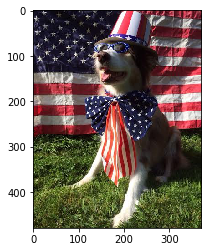

In [27]:
% matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('American_dog.jpg')
imgplot = plt.imshow(img)
plt.show()

### The algorithms have some flaws as it did detect the glasses and the tie but they didn't detect a dog wearing them ,however it's a nice pic , on the other hand the maximum configuration didn't pass 55 %

In [28]:
df_1clean.rating_numerator.astype(int).mean()

13.126485568760611

#### The numerator mean is approximately 13

In [31]:
twitter_counts_sum=[]
fav_counts_sum=[]
for i in range(15):
    twitter_counts_sum.append(df_1clean.retweet_count.loc[df_1clean['rating_numerator']==i].sum())
    fav_counts_sum.append(df_1clean.favorite_count.loc[df_1clean['rating_numerator']==i].sum())

    
fav_counts_sum 

[27742.0,
 48359.0,
 20311.0,
 45515.0,
 46761.0,
 137693.0,
 86943.0,
 196946.0,
 281444.0,
 437138.0,
 2121243.0,
 3540131.0,
 6529666.0,
 8007807.0,
 1417729.0]

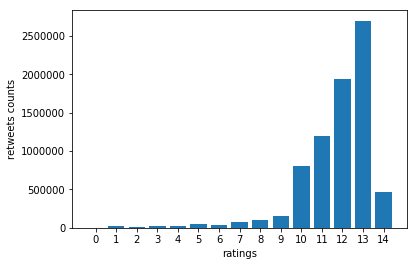

In [32]:
d=range(15)
plt.bar(d,twitter_counts_sum , tick_label=d)
plt.xlabel('ratings')
plt.ylabel('retweets counts');

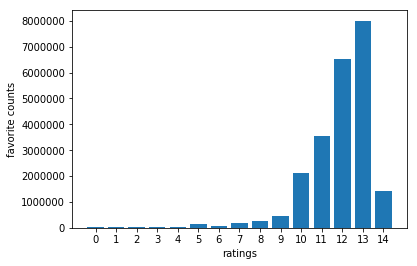

In [33]:
d=range(15)
plt.bar(d,fav_counts_sum , tick_label=d)
plt.xlabel('ratings')
plt.ylabel('favorite counts');

#### here is a bar chart  shows the highest retweet counts and favorite ratings is 13    

In [60]:
df_1clean.describe()

,img_num,algorithm_1_conf,algorithm_2_conf,algorithm_3_conf,favorite_count,retweet_count
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2354.000000,2354.000000
mean,1.203855,0.594548,1.345886e-01,6.032417e-02,9804.231946,3238.248938
std,0.561875,0.271174,1.006657e-01,5.090593e-02,14046.936186,5635.118698
min,1.000000,0.044333,1.011300e-08,1.740170e-10,52.000000,0.000000
25%,1.000000,0.364412,5.388625e-02,1.622240e-02,2046.000000,621.250000
50%,1.000000,0.588230,1.181810e-01,4.944380e-02,4457.500000,1469.500000
75%,1.000000,0.843855,1.955655e-01,9.180755e-02,12579.250000,3652.000000
max,4.000000,1.000000,4.880140e-01,2.734190e-01,229185.000000,79515.000000


### The mean of algorithm_1 configuration is the highest among algorithms = 0.594548, so the algorithm one is the most accurate

### The mean of favorite count is bigger than the mean of retweet_count 

In [97]:
s=df_1clean.groupby(['algorithm_prediction_1','breed_of_dog_1']).mean()
e=s.sort_values(by='retweet_count', ascending=False).head(30)
e

,,img_num,algorithm_1_conf,algorithm_2_conf,algorithm_3_conf,favorite_count,retweet_count
algorithm_prediction_1,breed_of_dog_1,,,,,,
Arabian_camel,False,1.666667,0.577370,0.139977,3.095786e-02,50746.333333,25446.000000
upright,False,1.000000,0.303415,0.181351,1.620840e-01,35178.000000,18963.000000
prison,False,3.000000,0.722320,0.050300,3.660369e-02,40432.666667,17052.666667
gondola,False,1.000000,0.226571,0.207440,1.026219e-01,27899.000000,16814.000000
bubble,False,1.000000,0.618865,0.073190,6.973723e-02,34349.000000,16159.000000
conch,False,3.000000,0.925621,0.032492,6.679080e-03,28519.000000,15071.000000
revolver,False,1.000000,0.190292,0.149064,6.604660e-02,35553.000000,14740.000000
remote_control,False,1.000000,0.881538,0.035513,3.408970e-02,30653.000000,14409.000000
beaver,False,2.000000,0.457094,0.228298,1.483090e-01,26068.000000,13517.000000


In [98]:
s=df_1clean.groupby(['algorithm_prediction_2','breed_of_dog_2']).mean()
e=s.sort_values(by='retweet_count', ascending=False).head(30)
e

,,img_num,algorithm_1_conf,algorithm_2_conf,algorithm_3_conf,favorite_count,retweet_count
algorithm_prediction_2,breed_of_dog_2,,,,,,
house_finch,False,2.000000,0.366248,0.209852,4.640320e-02,75639.000000,37911.000000
leafhopper,False,1.000000,0.997556,0.000159,1.324640e-04,67100.000000,31989.000000
palace,False,4.000000,0.907083,0.020089,7.849540e-03,49960.000000,21794.000000
Indian_elephant,False,1.000000,0.633296,0.197111,4.448837e-02,31743.666667,15452.666667
projectile,False,1.000000,0.190292,0.149064,6.604660e-02,35553.000000,14740.000000
dalmatian,True,2.250000,0.301164,0.182439,1.182687e-01,34807.500000,12692.000000
sea_lion,False,1.000000,0.582517,0.158735,6.774069e-02,25444.750000,12461.750000
envelope,False,1.000000,0.459992,0.130465,3.012443e-02,40502.000000,12360.666667
dumbbell,False,1.000000,0.971581,0.028418,5.595040e-07,35325.000000,10961.000000


In [99]:
s=df_1clean.groupby(['algorithm_prediction_3','breed_of_dog_3']).mean()
e=s.sort_values(by='retweet_count', ascending=False).head(30)
e

,,img_num,algorithm_1_conf,algorithm_2_conf,algorithm_3_conf,favorite_count,retweet_count
algorithm_prediction_3,breed_of_dog_3,,,,,,
pool_table,False,1.000000,0.318851,0.306525,1.115650e-01,55016.000000,33421.000000
guillotine,False,1.000000,0.492709,0.050566,1.529690e-02,49774.000000,18876.000000
conch,False,2.000000,0.312221,0.244040,1.302730e-01,58302.000000,18627.000000
theater_curtain,False,1.000000,0.063152,0.046692,4.627680e-02,35400.000000,17919.000000
hand-held_computer,False,1.000000,0.923987,0.009712,8.768570e-03,35052.000000,17465.000000
barbell,False,1.000000,0.289485,0.243297,1.436300e-01,31768.000000,15351.000000
tiger_cat,False,3.000000,0.925621,0.032492,6.679080e-03,28519.000000,15071.000000
loupe,False,1.000000,0.278600,0.155207,1.535980e-01,26239.000000,15043.000000
umbrella,False,3.333333,0.937660,0.013563,5.307852e-03,33550.666667,14566.666667


###### The most 30 retweeted dogs accroding to algorithm one are not breed of dogs, also algorithm two but is "dalmatian" is the highest retweeted dog accroding to the algorithm two, the most 30 retweeted dogs accroding to algorithm one are not breed of dogs

Text(0,0.5,'favorite_count in 10 Million')

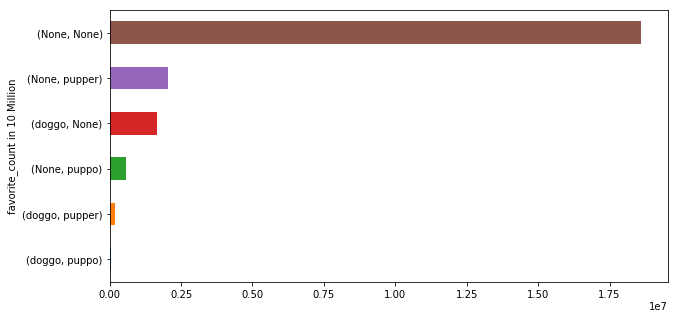

In [102]:
plt.figure(figsize=(10,5));
df_1clean.groupby(['doggo','dog_type']).sum().sort_values(by="favorite_count").favorite_count.plot(kind='barh');
plt.ylabel("favorite_count in 10 Million")

Text(0,0.5,'retweet_count in 1 Million')

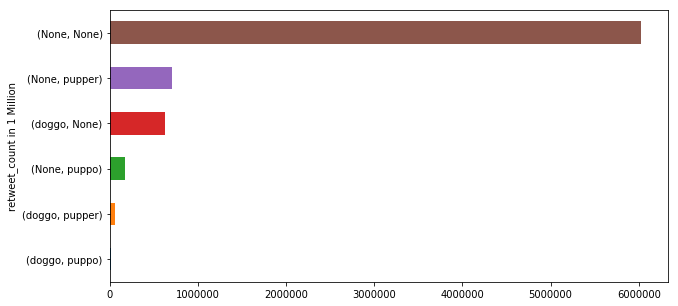

In [105]:
plt.figure(figsize=(10,5));
df_1clean.groupby(['doggo','dog_type']).sum().sort_values(by="retweet_count").retweet_count.plot(kind='barh');
plt.ylabel("retweet_count in 1 Million")

#### In favorite count doggo and dog_type are (None,None) is the most common then (None,pupper) then (doggo,None) then (None,puppo) then(doggo,pupper) then(doggo.puppo) , retweet_count is the same.

In [106]:
df_urls.to_csv('twitter_archive_urls.csv', index=False)
df_inreply.to_csv('twitter_archive_inreply.csv', index=False)

In [61]:
df_1clean.to_csv('twitter_archive_master.csv', index=False)